Accuracy: 0.9385964912280702


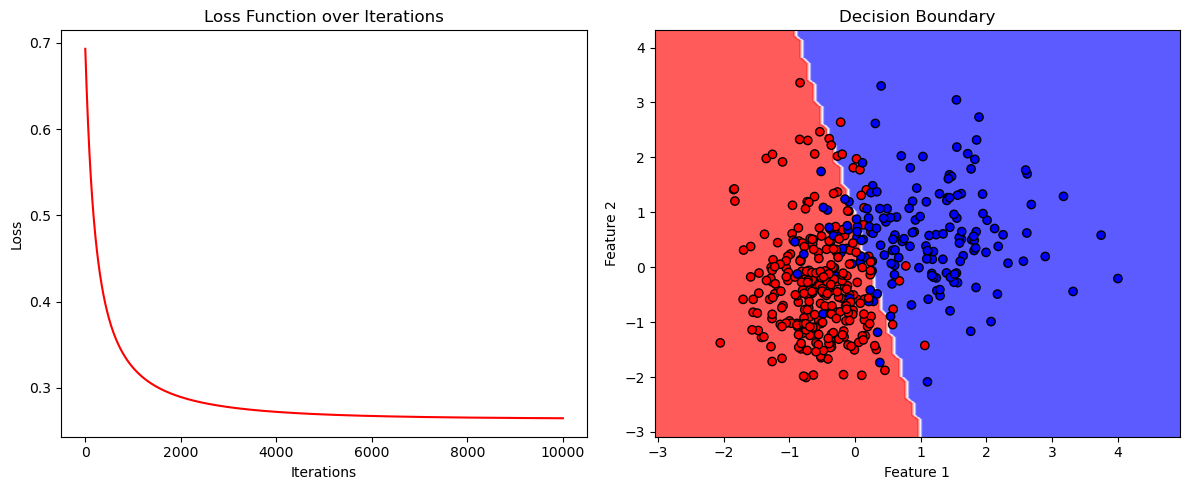

In [1]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Define sigmoid function
def sigmoid(x):
    """
    Compute the sigmoid function.
    Sigmoid maps real-valued inputs to the range (0, 1).
    Formula: sigmoid(x) = 1 / (1 + exp(-x))
    """
    return 1 / (1 + np.exp(-x))

# Logistic Regression class
class LogisticRegression:

    def __init__(self, lr=0.001, n_iters=1000, reg_strength=0.1):
        """
        Initialize the Logistic Regression model.
        :param lr: Learning rate for gradient descent.
        :param n_iters: Number of iterations for training.
        :param reg_strength: L2 regularization strength to prevent overfitting.
        """
        self.lr = lr  # Learning rate
        self.n_iters = n_iters  # Number of iterations
        self.reg_strength = reg_strength  # Regularization strength
        self.weights = None  # Weights (initialized during training)
        self.bias = None  # Bias (initialized during training)
        self.losses = []  # List to store loss values during training

    def fit(self, X, y):
        """
        Train the logistic regression model using gradient descent.
        :param X: Feature matrix.
        :param y: Target labels (0 or 1).
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Initialize weights as zeros
        self.bias = 0  # Initialize bias as zero

        for _ in range(self.n_iters):
            # Compute the linear combination of inputs and weights
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)  # Apply sigmoid to get probabilities

            # Compute gradients with L2 regularization
            dw = (1/n_samples) * np.dot(X.T, (predictions - y)) + (self.reg_strength / n_samples) * self.weights
            db = (1/n_samples) * np.sum(predictions - y)

            # Update weights and bias using gradient descent
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Compute loss with L2 regularization
            loss = -(1/n_samples) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions)) \
                   + (self.reg_strength / (2 * n_samples)) * np.sum(self.weights**2)
            self.losses.append(loss)  # Save loss for visualization

    def predict(self, X):
        """
        Predict class labels for input data.
        :param X: Feature matrix.
        :return: Predicted class labels (0 or 1).
        """
        linear_pred = np.dot(X, self.weights) + self.bias  # Compute linear combination
        y_pred = sigmoid(linear_pred)  # Apply sigmoid to get probabilities
        return [1 if y > 0.5 else 0 for y in y_pred]  # Threshold at 0.5

# Load Breast Cancer dataset
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target  # Features and target labels

# Use only the first two features for easy 2D visualization
X = X[:, :2]

# Split dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Standardize features to have mean 0 and variance 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test = scaler.transform(X_test)  # Transform test data using training parameters

# Initialize Logistic Regression model
clf = LogisticRegression(lr=0.01, n_iters=10000, reg_strength=0.1)
clf.fit(X_train, y_train)  # Train the model on training data

# Predict class labels on test set
y_pred = clf.predict(X_test)

# Define accuracy function
def accuracy(y_pred, y_test):
    """
    Compute accuracy as the proportion of correct predictions.
    :param y_pred: Predicted labels.
    :param y_test: True labels.
    :return: Accuracy value.
    """
    return np.sum(y_pred == y_test) / len(y_test)

# Compute and print accuracy
acc = accuracy(y_pred, y_test)
print(f"Accuracy: {acc}")

# Plotting
plt.figure(figsize=(12, 5))

# Plot loss curve
plt.subplot(1, 2, 1)  # Define the first subplot in a 1x2 grid
plt.plot(range(clf.n_iters), clf.losses, color='red')  # Plot the loss values over iterations
plt.title("Loss Function over Iterations")  # Add a title to the plot
plt.xlabel("Iterations")  # Label the x-axis to indicate number of iterations
plt.ylabel("Loss")  # Label the y-axis to indicate the loss value

# Visualize decision boundary
plt.subplot(1, 2, 2)  # Define the second subplot in a 1x2 grid

# Define the range for the grid based on the feature values (with padding)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

# Create a mesh grid of points within the defined range
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),  # x-coordinates of the grid
                     np.arange(y_min, y_max, 0.1))  # y-coordinates of the grid

# Predict the class label for each point in the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # Flatten the grid points and predict
Z = np.array(Z).reshape(xx.shape)  # Reshape predictions to match the grid shape

# Plot the decision boundary using filled contours
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bwr)  # Filled contours for regions

# Overlay the training data points on the decision boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.bwr,  # Color points by class
            edgecolors='k', marker='o')  # Add black edges to the points

plt.title("Decision Boundary")  # Add a title to the decision boundary plot
plt.xlabel("Feature 1")  # Label the x-axis to indicate the first feature
plt.ylabel("Feature 2")  # Label the y-axis to indicate the second feature

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Display both subplots
plt.show()
